
###### Data fields
 * Id - an Id that represents a (Store, Date) duple within the test set
 * Store - a unique Id for each store
 * Sales - the turnover for any given day (this is what you are predicting)
 * Customers - the number of customers on a given day
 * Open - an indicator for whether the store was open: 0 = closed, 1 = open
 * StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
 * SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
 * StoreType - differentiates between 4 different store models: a, b, c, d
 * Assortment - describes an assortment level: a = basic, b = extra, c = extended
 * CompetitionDistance - distance in meters to the nearest competitor store
 * CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
 * Promo - indicates whether a store is running a promo on that day
 * Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
 * Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
 * PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../scripts')
sys.path.append("../")
from eda_Read_data import ReadData
from cleaning import CleanDataFrame
# Importing the SimpleImputer class from sklearn
from sklearn.impute import SimpleImputer

In [11]:
loader = ReadData()
sample_df = loader.read_csv('../data/sample_submission.csv')
train_df = loader.read_csv('../data/train.csv')
store_df = loader.read_csv('../data/store.csv')
test_df = loader.read_csv('../data/test.csv')

c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\../scripts\eda_Read_data.py:44: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


In [12]:
train_store = pd.merge(train_df, store_df, how = 'left', on = "Store")
test_store = pd.merge(test_df, store_df, how = 'left', on = "Store")

In [13]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [15]:
cleaner= CleanDataFrame()
cleaner.run_pipeline(test_store)

c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\../scripts\cleaning.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PromoInterval"].loc[df["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\../scripts\cleaning.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PromoInterval"].loc[df["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\../scripts\cleaning.py:202: SettingWithCopyWarning: 
A value is t

ValueError: Length of values (0) does not match length of index (41088)

In [ ]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,1,2015,9,2015,0,0,0,0,1,mid month
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,1,2015,9,2015,0,0,0,0,1,mid month
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,1,2015,9,2015,0,0,0,0,1,mid month
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,1,2015,9,2015,0,0,0,0,1,mid month
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,1,2015,9,2015,0,0,0,0,1,mid month


In [ ]:
cleaner= CleanDataFrame()
cleaner.run_pipeline(test_store)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceYear,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
0,1,1,4,1.0,1,0,a,1270.0,9.0,2008.0,...,0.0,2015,9,2015,0,0,0,0,1,mid month
1,2,3,4,1.0,1,0,a,14130.0,12.0,2006.0,...,2011.0,2015,9,2015,0,0,0,0,1,mid month
2,3,7,4,1.0,1,0,c,24000.0,4.0,2013.0,...,0.0,2015,9,2015,0,0,0,0,1,mid month
3,4,8,4,1.0,1,0,a,7520.0,10.0,2014.0,...,0.0,2015,9,2015,0,0,0,0,1,mid month
4,5,9,4,1.0,1,0,c,2030.0,8.0,2000.0,...,0.0,2015,9,2015,0,0,0,0,1,mid month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,1.0,0,0,a,1900.0,6.0,2014.0,...,2013.0,2015,8,2015,0,0,0,0,1,start month
41084,41085,1112,6,1.0,0,0,c,1880.0,4.0,2006.0,...,0.0,2015,8,2015,0,0,0,0,1,start month
41085,41086,1113,6,1.0,0,0,c,9260.0,7.0,2010.0,...,0.0,2015,8,2015,0,0,0,0,1,start month
41086,41087,1114,6,1.0,0,0,c,870.0,7.0,2010.0,...,0.0,2015,8,2015,0,0,0,0,1,start month


In [17]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

test_store['StoreType']= label_encoder.fit_transform(test_store['StoreType'])
test_store['Assortment']= label_encoder.fit_transform(test_store['Assortment'])

In [18]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,Day,Month,Year,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday,month_level
0,1,1,4,2015-09-17,1.0,1,0,0,2,0,...,1,2015,9,2015,0,0,0,0,1,mid month
1,2,3,4,2015-09-17,1.0,1,0,0,0,0,...,1,2015,9,2015,0,0,0,0,1,mid month
2,3,7,4,2015-09-17,1.0,1,0,0,0,2,...,1,2015,9,2015,0,0,0,0,1,mid month
3,4,8,4,2015-09-17,1.0,1,0,0,0,0,...,1,2015,9,2015,0,0,0,0,1,mid month
4,5,9,4,2015-09-17,1.0,1,0,0,0,2,...,1,2015,9,2015,0,0,0,0,1,mid month


In [ ]:
# test_store.to_csv("../data/clean_test_data.csv")
# print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [19]:
cleaner= CleanDataFrame()
cleaner.get_numerical_columns(train_store)

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [20]:
cleaner.get_categorical_columns(train_store)

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [ ]:
# Function to fill categorical nulls with 0
"""
promo2since week and year are related to promo2, If the store had no promo thus having a null, we replace it with a zero.
A store is closed if not open
"""
def fill_categoricals_nulls(df):
    col=['Promo2SinceWeek','Promo2SinceYear','Open']
    for column in col:
        imp_median = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
        imp_median = imp_median.fit(df[[column]])
        df[column] = imp_median.transform(df[[column]]).ravel()
    
    return df


In [ ]:
# Function to fill categorical nulls with mode
def fill_categoricals_nulls(df):
    col=['PromoInterval']
    for column in col:
        imp_median = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=0)
        imp_median = imp_median.fit(df[[column]])
        df[column] = imp_median.transform(df[[column]]).ravel()
    
    return df

In [ ]:
# Function to fill numerical nulls with median
def fill_categoricals_nulls(df):
    col=['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
    for column in col:
        imp_median = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=0)
        imp_median = imp_median.fit(df[[column]])
        df[column] = imp_median.transform(df[[column]]).ravel()
    
    return df

In [ ]:
#filling NaN for stores that do not have promotions active
train_store['Promo2SinceWeek'].fillna(0, inplace=True)
train_store['Promo2SinceYear'].fillna(0, inplace=True)
train_store['PromoInterval'].fillna(0, inplace=True)

In [22]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
train_store.isna().sum()

In [23]:
# extracting year and month and day from Date 
train_store['Year']  = train_store['Date'].apply(lambda x: int(str(x)[:4]))
train_store['Month'] = train_store['Date'].apply(lambda x: int(str(x)[5:7]))
train_store['Day']  = pd.to_datetime(train_store['Date']).dt.day_name().values


In [24]:
#handling categorical attributes(by creating a binary feature for each category)
train_store['IsPublicHoliday'] = train_store['StateHoliday'].map(lambda x: 1 if x=='a' else 0)
train_store['IsEasterHoliday'] = train_store['StateHoliday'].map(lambda x: 1 if x=='b' else 0)
train_store['IsChristmasHoliday'] = train_store['StateHoliday'].map(lambda x: 1 if x=='c' else 0)


In [25]:
train_store['IsWeekend'] = train_store['Day'].map(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
train_store['IsWeekday'] = train_store['Day'].map(lambda x: 1 if x!='Saturday' or x!='Sunday' else 0)

In [ ]:
train_store.head()

In [26]:
train_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
# for promo interval
train_store["PromoInterval"].loc[train_store["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
train_store["PromoInterval"].loc[train_store["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
train_store["PromoInterval"].loc[train_store["PromoInterval"] == "Mar,Jun,Sept,Dec"] = 3

new_promo_interval = []
for i in range(len(train_store)):
    if train_store['PromoInterval'][i] == 'Jan,Apr,Jul,Oct':
        new_promo_interval.append(1)
    elif train_store['PromoInterval'][i] == 'Feb,May,Aug,Nov':
        new_promo_interval.append(2)
    elif train_store['PromoInterval'][i] == 'Mar,Jun,Sept,Dec':
        new_promo_interval.append(3)
    else:
        new_promo_interval.append(0)
        
train_store['PromoInterval'] = new_promo_interval

## EXTRACTING DATETIME COLUMNS
1. Create a holiday list
2. find a holiday date that is closest each date 
3. iterate through the list

In [28]:
df = pd.DataFrame({'Date':train_store['Date']})

In [ ]:
train_store.head()

In [29]:

for x in pd.to_datetime(train_store['Date']):
    for holiday in holidays_list:
        date_diff = (holiday-x).days
if  abs(date_diff)<= 5:
    my_list.append(date_diff)

NameError: name 'holidays_list' is not defined

In [ ]:
df = pd.to_datetime(train_store['Date'])

In [ ]:
train_store['Date'] = pd.to_datetime(train_store['Date'])
train_store['Date'].head()

In [ ]:
def month_level(df: pd.DataFrame) -> pd.DataFrame:
        def setMonthPeriod(date):
            if date.day<11:
                return 'new month'
            elif date.day<22:
                return 'mid month'
            else:
                return 'end month'
        df['month_level']= df['Date'].apply(setMonthPeriod)
        return df

In [ ]:
train_store['month_level'] = train_store['Date'].map(lambda x:  'start month' if x.day < 11 else ('mid month' if x.day < 22 else 'end month'))
train_store.head()

In [ ]:
cleaner= CleanDataFrame()
cleaner.run_pipeline(train_store)

In [ ]:
cleaner= CleanDataFrame()
cleaner.run_pipeline(test_store)

In [ ]:
train_store.head()

## Removing outliers

In [30]:
mean_of_sales = np.mean(train_store['Sales']) 
std_of_sales = np.std(train_store['Sales'])
print("Mean of Sales: ",mean_of_sales)
print("Standard Deviation of Sales: ",std_of_sales)

threshold = 3
outlier = [] 
for i in train_store['Sales']: 
    z = (i-mean_of_sales)/std_of_sales
    if z > threshold: 
        outlier.append(i) 
print('Total outlier in dataset are: ', len(outlier))
print("Maximum Sales Outlier: ", max(outlier))
print("Minimum Sales Outlier: ", min(outlier))

Mean of Sales:  5773.818972305593
Standard Deviation of Sales:  3849.924282844153
Total outlier in dataset are:  9731
Maximum Sales Outlier:  41551
Minimum Sales Outlier:  17325


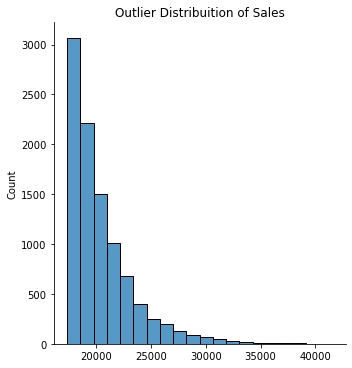

In [31]:
sns.displot(x=outlier,bins=20).set(title='Outlier Distribuition of Sales')

In [32]:
sales_zero = train_store.loc[train_store['Sales'] == 0] 
sales_greater_than_30 = train_store.loc[train_store['Sales'] > 30000]

print("Length of actual dataset:", len(train_store))
print("Length of data where sales is 0:", len(sales_zero),
      " which is", len(sales_zero)/len(train_store)*100, "% of the whole data", )

print("Length of data which is greater than 30:", len(sales_greater_than_30),
      "which is ", len(sales_greater_than_30)/len(train_store)*100, "% of the whole data")

Length of actual dataset: 1017209
Length of data where sales is 0: 172871  which is 16.994639253093514 % of the whole data
Length of data which is greater than 30: 153 which is  0.015041156733768577 % of the whole data


In [33]:
train_store.drop(train_store.loc[train_store['Sales'] > 30000].index,inplace=True)
train_store.shape

(1017056, 26)

In [ ]:
train_store.head()

In [34]:
# encoding all categorical variables to numeric values
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

train_store['StoreType']= label_encoder.fit_transform(train_store['StoreType'])
train_store['Assortment']= label_encoder.fit_transform(train_store['Assortment'])

In [35]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Year,Month,Day,IsPublicHoliday,IsEasterHoliday,IsChristmasHoliday,IsWeekend,IsWeekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,NaN,NaN,2015,7,Friday,0,0,0,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,2010.0,1,2015,7,Friday,0,0,0,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,2011.0,1,2015,7,Friday,0,0,0,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,NaN,NaN,2015,7,Friday,0,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,NaN,NaN,2015,7,Friday,0,0,0,0,1


In [ ]:
# train_store.to_csv("../data/clean_train_data.csv")
# print('DataFrame is written to Excel File successfully.')